# Definicja równania

$\frac{d^2u}{dx^2}=4\pi Gρ(x)$  
$u(0)=-5$  
$u(3)=-4$  
$I=[0,3]$

$ρ(x)=\begin{cases}
0 & \text{dla}\ x \in [0, 1] \\
10^{11} & \text{dla}\ x \in (1, 2] \\
0 & \text{dla}\ x \in (2, 3] \\
\end{cases}$

## Sformułowanie słabe

$\int_0^3u''vdx = \int_0^34\pi Gρ(x)vdx$  
$u'v|_0^3 - \int_0^3u'v'dx = \int_0^34\pi Gρ(x)vdx$  

$u'(3)v(3) - u'(0)v(0) - \int_0^3u'v'dx = \int_0^34\pi Gρ(x)vdx$  
$u'(3)v(3) - u'(0)v(0)-\int_0^3u'v'dx = 4\pi G(\int_0^1ρ(x)vdx + \int_1^2ρ(x)vdx + \int_2^3ρ(x)vdx)$  
$u'(3)v(3) - u'(0)v(0)-\int_0^3u'v'dx = 4\pi G(\int_0^10vdx + \int_1^2 10^{11} vdx + \int_2^30vdx)$  
$u'(3)v(3) - u'(0)v(0)-\int_0^3u'v'dx = 4*10^{11}*\pi G \int_1^2 vdx$  
$B(u, v) = L(v)$

$B(u, v) = u'(3)v(3) - u'(0)v(0) - \int_0^3u'v'dx$  
$L(v) = 4*10^{11}*\pi G \int_1^2 vdx = k\int_1^2vdx$

$B(u -5e_0 - 4e_n , v) = -\int_0^3u'v'dx$  
$\stackrel{\sim}{B}(u, v) = -\int_0^3u'v'dx$  
$\stackrel{\sim}{L}(v) = k\int_1^2vdx - B(-5e_0 - 4e_n, v)$  
$\stackrel{\sim}{L}(v) = k\int_1^2vdx +5B(e_0, v) + 4B(e_n, v)$

### Parametry obliczeń

In [35]:
N = 100 # liczba elementów
left, right = 0.0, 3.0 # zakres
m = 1000 # liczba punktów użyta podczas wyliczania całek

### Kod początkowy

In [36]:
import numpy as np
import matplotlib.pyplot as plt

k = 4 * np.pi * 6.67259
n = N # liczba elementów podprzestrzeni, po uwzględnieniu warunków brzegowych
w = (right - left) / (n+1) # szerokość elementu

## Elementy skończone

$e_i=\begin{cases}
    x-(p_i-p_{i-1})*\frac{1}{p_i-p_{i-1}} & \text{dla}\ x < p_i \\
    x-p_i*\frac{-1}{p_i-p_{i-1}} & \text{dla}\ x >= p_i \\
\end{cases}$


In [37]:
def e(center, w, first=False, last=False):
    a = 1/w
    f = lambda x: (x - (center - w)) * a if x < center else (x - center) * (-a) + 1
    
    if first:
        return (lambda x: 0.0 if x < center or x > center + w else f(x))
    elif last:
        return (lambda x: 0.0 if x < center - w or x > center else f(x))
    else:
        return (lambda x: 0.0 if x < center - w or x > center + w else f(x))


## Pochodne elementów skończonych

$e'_i=\begin{cases}
    \frac{1}{p_i-p_{i-1}} & \text{dla}\ x < p_i \\
    \frac{-1}{p_i-p_{i-1}} & \text{dla}\ x >= p_i \\
\end{cases}$

In [38]:
def de(center, w, first=False, last=False):
    a = 1/w
    f = lambda x: a if x < center else -a

    if first:
        return (lambda x: 0.0 if x < center or x > center+w else f(x))
    elif last:
        return (lambda x: 0.0 if x < center-w or x > center else f(x))
    else:
        return (lambda x: 0.0 if x < center-w or x > center+w else f(x))

### B(u, v)

In [39]:
def b(up, vp, n, left=0, right=3):
    xs = np.linspace(left, right, n)
    ys = np.array([up(x)*vp(x) for x in xs]).reshape(1, -1)[0]

    b = np.trapz(ys, x=xs)
    return -b

### L(v)

In [40]:
def l(v, n, left=1, right=2):
    xs = np.linspace(left, right, n)
    ys = np.array([v(x) for x in xs]).reshape(1, -1)[0]

    b = np.trapz(ys, x=xs)
    return k * b

## $e_i$ and $e'_i$ 

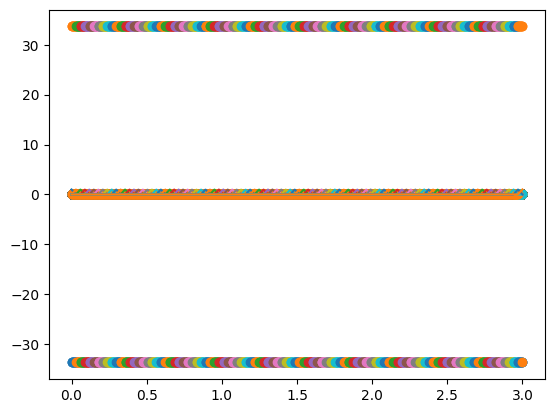

In [41]:
points = np.linspace(left, right, n+2)
V = np.array([e(points[i], w, i==0, i==n+1) for i in range(n+2)])
dV = np.array([de(points[i], w, i==0, i==n+1) for i in range(n+2)])


show_points = np.linspace(left, right, (n+2)*10)
for i in range(n+2):
    plt.plot(show_points, [V[i](x) for x in show_points])
    plt.scatter(show_points, [dV[i](x) for x in show_points])
plt.show()



## Matrix of $b_{i,j} = B(e_i, e_j)$

In [42]:
B = [[b(dV[i], dV[j], m) for i in range(1, n+1)] for j in range(1, n+1)]

## Vector of $l_i = L(e_i) + 5B(e_0, e_i) + 4B(e_n, e_i)$

$\stackrel{\sim}{L}(v) = k\int_1^2vdx +5B(e_0, v) + 4B(e_n, v)$

In [43]:
L = np.array([l(V[i], m) + 5*b(dV[0], dV[i], m) + 4*b(dV[n+1], dV[i], m) for i in range(1,n+1)])

### Kalkulacja wektora $u_i$

In [44]:
Bm = np.matrix(B)
Bmi = Bm.getI()
Lm = np.matrix([L]).getT()
U = np.array(Bm * Lm).reshape(1, -1)[0]

print(Bm)
print(Bmi)
print(Lm)
print(U)

[[-66.37287287  34.0373707   -0.         ...  -0.          -0.
   -0.        ]
 [ 34.0373707  -68.07474141  34.0373707  ...  -0.          -0.
   -0.        ]
 [ -0.          34.0373707  -68.07474141 ...  -0.          -0.
   -0.        ]
 ...
 [ -0.          -0.          -0.         ... -68.07474141  34.0373707
   -0.        ]
 [ -0.          -0.          -0.         ...  34.0373707  -68.07474141
   34.0373707 ]
 [ -0.          -0.          -0.         ...  -0.          34.0373707
  -66.37287287]]
[[-0.03060728 -0.03030473 -0.03000218 ... -0.00092358 -0.00062103
  -0.00031848]
 [-0.03030473 -0.05909423 -0.05850425 ... -0.00180098 -0.001211
  -0.00062103]
 [-0.03000218 -0.05850425 -0.08700633 ... -0.00267838 -0.00180098
  -0.00092358]
 ...
 [-0.00092358 -0.00180098 -0.00267838 ... -0.08700633 -0.05850425
  -0.03000218]
 [-0.00062103 -0.001211   -0.00180098 ... -0.05850425 -0.05909423
  -0.03030473]
 [-0.00031848 -0.00062103 -0.00092358 ... -0.03000218 -0.03030473
  -0.03060728]]
[[1.6167

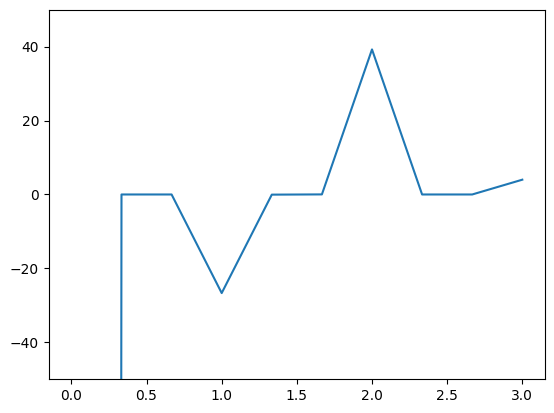

In [45]:
u = lambda x: sum([U[i] * V[i](x) for i in range(n)]) - 5 * V[0](x) + 4 * V[n+1](x) 

xs = np.linspace(0, 3, 10)
ys = np.array([u(x) for x in xs]).reshape(1, -1)[0]

# plt.scatter
plt.plot(xs, ys)
ys = plt.gca()
ys.set_ylim([-50, 50])
plt.show()